In [23]:
import networkx as nx
filename = 'WikiData.txt'
G=nx.DiGraph()
with open(filename) as file:
    for line in file:
        head, tail = [int(x) for x in line.split()]
        G.add_edge(head,tail)
pr=nx.pagerank(G,alpha=0.85)
x = 0;
for node, value in pr.items():
    x = x + value
print(x)

0.9999999999999661


In [45]:
import networkx as nx
import numpy as np
def init_graph(file_path) :
    graph=nx. DiGraph() 
    file = open(file_path,"r")
    for line in open("WikiData.txt"):
        data = line.partition("	")
        head = data[0]
        tail = data[2]
        graph.add_edge(head.strip(),tail.strip()) #将关系对加入图中
    return graph

G = init_graph("WikiData.txt")
pr=nx.pagerank (G,alpha=0.85) #计算pr
result= {}
for node, value in pr.items() :
    result[node] = value
sorted(result.items(),key=lambda item:item[1])
for i,(k,v) in enumerate(result.items()):
    print({k:v},end="")
    if i==100:
        print()
        break
# print(result)

{'30': 0.00017349553934328362}{'1412': 0.0008141761230496596}{'3352': 0.0017851250122027215}{'5254': 0.0021500675059293235}{'5543': 0.0010508052619841281}{'7478': 0.0008124303526134783}{'3': 0.00020539498232448027}{'28': 0.0016986730322136937}{'39': 0.0003439790689580258}{'54': 0.0003476546497189804}{'108': 0.00043983711534545167}{'152': 0.0005817197428805893}{'178': 0.0002975848833195019}{'182': 0.00016083873728146711}{'214': 0.001659919966936546}{'271': 0.001334924091441659}{'286': 0.00017367757770305088}{'300': 0.00015065607046072738}{'348': 0.00017393564565284633}{'349': 9.460415271381965e-05}{'371': 0.00028929033923574956}{'567': 0.0003315269129516528}{'581': 0.00010905154270480285}{'584': 0.00022615441013923315}{'586': 0.0001051882501948107}{'590': 0.0001945807586420494}{'604': 0.00018151640169193395}{'611': 0.00021640905598463537}{'8283': 0.00032879238326170694}{'25': 5.0487823458630175e-05}{'6': 0.0003118325097843746}{'8': 0.00032663557615950447}{'19': 0.00013112179292607272}{'

AttributeError: 'dict' object has no attribute 'edges'

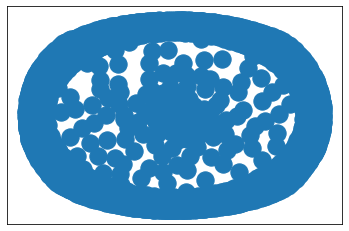

In [43]:
nx.draw_networkx(pr)
plt.show()

In [81]:
import numpy as np
x=0
y=0
for line in open("WikiData.txt"):
    data = line.partition("	") 
    head = int(data[0])
    tail = int(data[2])
    x=max(x,head)
    y=max(y,tail) 
print(x , y)

8274 8297


In [86]:
# 数据读入
N=8297
dt = np.dtype([('from', int), ('to', int)])
A = np.empty((0), dtype=dt)
for line in open("WikiData.txt"):
    head = int(line.split()[0])
    tail = int(line.split()[1])
    A = np.append(A, np.array([(head - 1, tail - 1)], dtype=dt))
A = np.sort(A, order='from')
A

array([(   2,   27), (   2,   29), (   2,   38), ..., (8271, 4939),
       (8272, 4939), (8273, 8274)], dtype=[('from', '<i8'), ('to', '<i8')])

In [88]:
# dead ends
w = np.zeros(N)
for a in A:
    w[a[0]] = 1
np.size(np.where(w==0))

2187

In [91]:
# spider trap
u = np.zeros(N)
for a in A:
    if a[0]==a[1]:
        u[[a[0]]]=1
np.size(np.where(u==1))

0

In [46]:
A
mm=A[0][0]
sum=0
B = np.empty((0), dtype=dt)
for a in A:
    if a[0]==mm:
        sum+=1
    else:
        B = np.append(B, np.array([(mm, sum)], dtype=dt))
        mm=a[0]
        sum=0
B

array([(   2, 23), (   3, 28), (   4, 22), ..., (8270,  0), (8271,  0),
       (8272,  0)], dtype=[('from', '<i8'), ('to', '<i8')])

In [ ]:
# import numpy as np    #C是trap
M = [[0, 1/2,0, 1/2],
     [1/3, 0, 0,1/2],
     [1/3, 1/2, 1,0],
     [1/3,0,0,0]]
U = [1 / 4, 1 / 4, 1 / 4,1/4]
U0 = np.array(U)
 
U_past_none_alpha = []
while True:
    U = np.dot(M, U)
    if str(U) == str(U_past_none_alpha):
        break
    U_past_none_alpha = U
print('Un converge1 to: ', U)
 
U_past_has_alpha = []
while True:
    U = 0.8 * (np.dot(M, U)) + 0.2 * U0
    # print('Un: ', U)
    if str(U) == str(U_past_has_alpha):
        break
    U_past_has_alpha = U
print('Un converge2 to: ', U)

In [1]:
import numpy as np
import time
beta = 0.85
threshold = 1.0e-8
NUM = 8297


def fun(r):
    #数据读入，为处理稀疏矩阵，将各条边以点对的形式储存在A中
    dt = np.dtype([('from', int), ('to', int)])
    A = np.empty((0), dtype=dt)
    for line in open("WikiData.txt"):
        data = line.partition("	")
        x = int(data[0])
        y = int(data[2])
        A = np.append(A, np.array([(x - 1, y - 1)], dtype=dt))
    #将边的集合A以出发点的序号排序便于后续计算
    A = np.sort(A, order='from')
    #利用w记录各点出度是否为零，便于发现dead end
    w = np.zeros((NUM))
    for a in A:
        w[a[0]] = 1
    v_new = np.ones(NUM) * 1 / NUM
    v_old = v_new
    B = v_new
    rank = 1
    #当前后两次的各点的value值的距离和小于阈值threshold或迭代次数大于r时结束迭代
    while ((np.sum(np.abs(v_new - v_old)) > threshold or rank == 1) and rank<r):
        v_old = v_new
        x_old = A[0]
        start = end = 0
        v_new = np.zeros(NUM)
        for x in A:
            #对于从同一点出发的边统一处理，仅需从A中读取从某一点出发的所有边即可，实现了分块矩阵
            if (x[0] != x_old[0]):
                for i in range(start, end):
                    v_new[A[i][1]] += v_old[x_old[0]] / (end - start)
                start = end
                x_old = x
                end += 1
            else:
                end += 1
        index = 0
        sum = 0
        #对于dead end进行random teleport
        for x in w:
            if (x == 0):
                sum += v_old[index]
                index += 1
            else:
                index += 1
        v_new += sum * np.ones(NUM) * 1 / NUM
        v_new = beta * v_new + (1 - beta) * B
        rank += 1
    return rank, v_new


if __name__ == "__main__":
    start = time.clock()
    rank, v = fun(100)
    v /= np.sum(v)
    w = np.argsort(-v)
    f = open("optimize_result.txt", "w")
    for i in range(100):
        f.writelines(str(w[i]+1)+' '+str(v[w[i]])+'\n')
    end = time.clock()
    print('time cost: ', str(end - start), 's')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:59: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


time cost:  29.905541 s


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:66: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [ ]:
# 也许可以用来验证？
from PageRank import PageRanker
web = ((0, 1, 0, 0),
       (0, 0, 1, 0),
       (0, 0, 0, 1),
       (1, 0, 0, 0))

pr = PageRanker(0.85, web)
pr.improve_guess(100)
print(pr.getPageRank())

In [5]:
import numpy as np
import time
import os

class page_rank():
    def __init__(self):
        self.input_path = 'WikiData.txt'
        os.mkdir("./output/")
        self.block_base_path = 'output/'
    # 分块数据读取
    def load_data(self, path):
        f = open(path, 'r')
        data = []
        for line in f:
            x=int(line.split()[0])
            y=int(line.split()[1])
            data.append([x, y])
        f.close()
        return data
    
    # 以稀疏形式保存,只存储非零链接
    def get_edges(self, data, nodemap):
        data = np.array(data)
        edges = np.zeros(data.shape)
        for i in range(len(data)):
            edges[i] = [nodemap[data[i][0]], nodemap[data[i][1]]]
        return edges

    # 数据分块保存到output, 返回分块文件数
    def divide_data(self, block_size)->int:
        inputfile = open(self.input_path, 'r')
        count = 0
        file_index = 0
        dest_file = None
        for line in inputfile:
            if count % block_size == 0:
                if dest_file:
                    dest_file.close()
                dest_file = open(self.block_base_path + str(file_index) + '.txt', 'w')
                file_index += 1
            dest_file.write(line)
            count += 1
        return file_index

    # 获取数据中Node、最大NodeID
    def get_Info(self, num):
        node = []
        max_node = 0
        for i in range(num):
            filename = self.block_base_path + str(i) + '.txt'
            f = open(filename, 'r')
            for line in f:
                x, y = line.split()
                max_node=max(max_node,max(int(x),int(y)))
                node.append(int(x))
                node.append(int(y))
            f.close()
        # 去重
        node = list(set(node))
        return node, max_node

    # 节点映射及r向量初值
    def preprocess(self, node, max_node):
        nodemap = [0 for i in range(max_node + 1)]
        for i in range(len(node)):
            nodemap[node[i]] = i
        # 初始化page_rank向量
        r = [1.0 / len(node) for i in range(len(node))]
        return nodemap, r

    # 各节点出度
    def get_out_degree(self, num, node, nodemap):
        out = [0 for i in range(len(node))]
        for i in range(num):
            block = self.block_base_path + str(i) + '.txt'
            f = open(block, 'r')
            for line in f:
                index = int(line.split()[0])
                index = nodemap[index]
                out[index] += 1
        return out

    # pagerank
    def block_stripe_page_rank(self, num, node, nodemap, r, out, beta, threshold):
        r_old = r
        while True:
            r_new = [0 for i in range(len(node))]
            # 分块读取数据构成分块矩阵
            for i in range(num):
                block = self.block_base_path + str(i) + '.txt'
                data = self.load_data(block)
                edges = self.get_edges(data, nodemap)
                for edge in edges:
                    r_new[int(edge[1])] += r_old[int(edge[0])] * beta / out[int(edge[0])]
            r_sum = sum(r_new) # 对应相加得到一轮迭代的r向量
            r_sub = np.ones(len(node)) * (1 - r_sum) / len(node) # rnew=rnew'+(1-S)/N
            r_cur = r_new + r_sub
            s = np.sqrt(sum((r_cur - r_old) ** 2)) # 验证是否到收敛
            # 单次迭代改变值小于threshold时,判断收敛,结束循环
            if s <= threshold:
                r_old = r_cur
                break
            else:
                r_old = r_cur
        return r_old

    # 获取top100ID及其pagerank值
    def get_top(self, num, nodemap, r):
        r_index = r.argsort()[::-1][:100]
        r.sort()
        top_r = r[::-1][:100]
        top_index = np.zeros(100)
        for i in range(100):
            top_index[i] = nodemap.index(r_index[i])
        top_index = [int(i) for i in top_index]
        for i in range(100):
            print(top_index[i], top_r[i])
        return top_index, top_r
    
    # 写结果
    def write_result(self, top_index, top_r):
        f = open('result.txt', 'w')
        for i in range(len(top_index)):
            f.write(str(top_index[i]) + '  ' + str(top_r[i]) + '\n')
        f.close()
        return
    
    # 运行
    def do_page_rank(self):
        block_num = self.divide_data(103689) # 切分数据
        node, max_node = self.get_Info(block_num) # Node整理 MaxNodeID
        nodemap, r = self.preprocess(node, max_node) # 稀疏优化
        out = self.get_out_degree(block_num, node, nodemap) # 出度
        r_final = self.block_stripe_page_rank(block_num, node, nodemap, r, out, 0.85,1e-8) #执行PR
        top_index, top_r = self.get_top(100, nodemap, r_final) # 输出结果
        self.write_result(top_index, top_r) # 写文件


if __name__ == '__main__':
    pr = page_rank()
    start = time.clock()
    pr.do_page_rank()
    end = time.clock()
    print('time cost: ', str(end - start), 's')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:141: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


4037 0.004607173541274757
15 0.0036798641241363272
6634 0.003586847882692001
2625 0.0032836563440502785
2398 0.00260863538954167
2470 0.002523771817886781
2237 0.0024966268820258764
4191 0.0022678518354148237
7553 0.0021697304211384686
5254 0.002150100577929687
2328 0.0020392599534253416
1186 0.002035534199573073
1297 0.0019458409158446925
4335 0.0019367624361138894
7620 0.0019320804227969835
5412 0.0019189157844738758
7632 0.0019077424025526243
4875 0.0018738133405806533
6946 0.001808421316008189
3352 0.0017839563628371292
6832 0.0017681829612740372
2654 0.0017669820285580794
762 0.0017421460312599976
737 0.0017396339560050952
2066 0.0017156986026309483
8293 0.0017053078184470958
3089 0.0017020103760858913
28 0.001688809969596617
2535 0.0016662038448303678
3334 0.001656961023333257
214 0.0016515170494281744
665 0.0016430660842306074
4735 0.0016192033740266472
6774 0.001614888022031493
7092 0.0016016276735803144
2565 0.0015511786522135714
5484 0.0015430211797180045
8042 0.0014768009772

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:143: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [6]:
import numpy as np
import time
import psutil
import os

maxNode = 8297
showMem = True

def load_data(path):
    f = open(path, 'r')
    data = []
    for line in f:
        x, y = line.split()
        data.append([int(x), int(y)])
    f.close()
    return data

def data2matrix(data):
    matrix = np.zeros((maxNode, maxNode))
    for line in data:
        matrix[line[1] - 1][line[0] - 1] = 1
    return matrix

def do_pagerank(matrix, outdegree, indegree, r, beta):
    r_old = r
    rank_time = 1
    while np.sum(np.abs(r - r_old)) > 1e-5 or rank_time == 1:
        r_new = np.zeros(maxNode)
        r_old = r
        for j in range(maxNode):
            r_new[j] = 0
            for i in range(maxNode):
                if matrix[j][i] == 1:
                    r_new[j] += beta * r_old[i] / outdegree[i]
        if showMem:
            process = psutil.Process(os.getpid())
            print('Used Memory:', process.memory_info().rss / 1024 / 1024, 'MB')
            showMem = False

        S = np.sum(r_new)
        r_old = r
        r = r_new + (1 - S) / maxNode
        print(np.sum(np.abs(r - r_old)))
        rank_time += 1
    return r


if __name__ == '__main__':
    start = time.clock()

    data = np.array(load_data('./WikiData.txt'))
    matrix = data2matrix(data)
    outdegree = np.sum(matrix, axis=0)
    indegree = np.sum(matrix, axis=1)
    r = np.ones(maxNode) * 1 / maxNode
    r = do_pagerank(matrix, outdegree, indegree, r, 0.85)

    end = time.clock()

    print("time cost: ", end - start, "s")


    f = open("basic_result.txt", "w")
    w = np.argsort(-r)
    for i in range(100):
        f.writelines(str(w[i] + 1) + ' ' + str(r[w[i]]) + '\n')

In [ ]:
%%timeit 
data = np.array(load_data('./WikiData.txt'))
matrix = data2matrix(data)
outdegree = np.sum(matrix, axis=0)
indegree = np.sum(matrix, axis=1)
r = np.ones(maxNode) * 1 / maxNode
r = do_pagerank(matrix, outdegree, indegree, r, 0.85)

0.9604148312553853
0.2198668090874194
0.05151991812828957
0.012274788643562691
0.003675034635717308
0.0013275821089845374
0.0005544586863873341
0.0002591338171910082
0.00012156962412320941
5.951853667995937e-05
2.8614817607663553e-05
1.4147705061129094e-05
6.816876693377552e-06
0.9604148312553853
0.2198668090874194
0.05151991812828957
0.012274788643562691
0.003675034635717308
0.0013275821089845374
0.0005544586863873341
0.0002591338171910082
0.00012156962412320941
5.951853667995937e-05
2.8614817607663553e-05
1.4147705061129094e-05
6.816876693377552e-06
0.9604148312553853
0.2198668090874194
0.05151991812828957
0.012274788643562691
0.003675034635717308
0.0013275821089845374
0.0005544586863873341
